# USED CAR PRICE PREDICTION USING LINEAR REGRESSION

#### This notebook implements the Multiple Linear Regression to predict the price of used cars using diffrent features like type of Year, Kilometer driven,Brand, CC etc.

## IMPORT LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## IMPORTING DATA

In [160]:
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\australian cars')

In [161]:
df=pd.read_csv('cars.csv')

In [162]:
df.head(2)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7


## CLEANING AND PREPROCESSING

In [163]:
#Finding is there any null values in our dataset

df.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

### Replacing the space values 

In [164]:
df['Status']=df['Status'].str.replace(' ','')

df['Brand']=df['Brand'].str.replace('-', '')

### Converting sub-categories into a single entity

#### Type

In [165]:
df['Type'].unique()

array(['Wagon', 'Cabriolet', 'Sportswagon', 'Sedan', 'Cab Chassis',
       'Hatchback', 'Van', 'Crew Cab Van', 'Liftback',
       'Double Cab Utility', 'Crew Cab Utility', 'Double Cab Chassis',
       'Crew Cab Pickup', 'Super Cab Chassis', 'Convertible',
       'Dual Cab Pick-up', 'Double Cab Pick Up', 'Softtop', 'Roadster',
       'Dual Cab Utility', 'Coupe', 'King Cab Pickup', 'Utility',
       'Dual Cab Chassis', 'Club Cab Pickup', 'Hardtop',
       'Club Cab Chassis', 'Crew Cab Chassis', 'X Cab Cab Chassis',
       'Sportback', 'Fastback', 'Saloon', 'Space Cab Utility',
       'Freestyle Cab Chassis', 'Bus', 'Super Cab Utility',
       'X Cab Pickup', 'Estate', 'Panel Van', 'Blind Van',
       'Space Cab Chassis', 'Club Cab Utility', 'Leaf Cab Chassis',
       'Coach', 'Crew Van', 'Troop Carrier', 'King Cab Pick Up', 'Pickup',
       'X Cab Utility', 'Space Cab Pickup', 'Freestyle Utility',
       'Super Cab Pickup', 'Coil Cab Chassis', 'Cab Chassis Tray',
       'Softback', 'King

In [166]:
df['Type']=df['Type'].replace(['King Cab Utility','Freestyle Utility','Club Cab Utility','X Cab Utility','Club Cab Utility','Space Cab Utility','Super Cab Utility','Crew Cab Utility','Double Cab Utility','Dual Cab Utility'],'Utility')
df['Type']=df['Type'].replace(['Panel Van','Crew Cab Van','Blind Van','Crew Van'],'Van')
df['Type']=df['Type'].replace(['King Cab Pick Up','Super Cab Pickup','Club Cab Pickup','Space Cab Pickup','King Cab Pickup','X Cab Pickup','Crew Cab Pickup','Dual Cab Pick-up','Double Cab Pick Up'], 'Pickup')
df['Type']=df['Type'].replace(['Cab Chassis Tray','Coil Cab Chassis','Leaf Cab Chassis','Club Cab Chassis','Super Cab Chassis','Space Cab Chassis','Dual Cab Chassis','Crew Cab Chassis','Double Cab Chassis','X Cab Cab Chassis','Freestyle Cab Chassis'],'Cab Chassis')
df['Type']=df['Type'].replace(['Estate', 'Troop Carrier'], 'SUV')
df['Type']=df['Type'].replace(['Saloon','Softtop','Hardtop','Convertible','Cabriolet','Sportback','Roadster','Liftback','Fastback','Softback','Coupe'], 'Sedan')
df['Type']=df['Type'].replace(['Coach'],'Bus')
df['Type']=df['Type'].replace(['Sportswagon'],'Wagon')
df['Type']=df['Type'].replace(['Cab Chassis', 'Pickup'], 'SUV')

#### Fuel

In [167]:
df['Fuel'].unique()

array(['Unleaded Petrol', 'Diesel', 'Premium Unleaded Petrol',
       'Premium Unleaded/Electric', 'Unleaded Petrol/Electric',
       'Liquid Petroleum Gas', 'Diesel/Electric'], dtype=object)

In [168]:
#Converting many of the sub-categories into a single entity using a different method for easy understanding.

def cat_fuel(inp):
    if inp=='Unleaded Petrol' or inp=='Premium Unleaded Petrol':
        return 'Petrol'
    elif inp=='Unleaded Petrol/Electric'or inp=='Premium Unleaded/Electric'or inp=='Diesel/Electric':
        return 'Hybrid'
    elif inp=='Diesel':
        return 'Diesel'
    elif inp=='Liquid Petroleum Gas':
        return 'Liquid Petroleum Gas'
    else:
        return 'other'
    
# Assigning a new column to our dataset with revised set of data's.

df['Fuels']=df['Fuel'].apply(cat_fuel)

#### Gearbox

In [169]:
df['Gearbox'].unique()

array(['Automatic', 'Manual', 'Front', 'AWD', 'Rear'], dtype=object)

In [170]:
def cat_gear(inp):
    if inp=='Automatic'or inp=='AWD':
        return 'Automatic'
    elif inp=='Manual'or inp=='Front'or inp=='Rear':
        return 'Manual'
    else:
        return 'Other'
    

df['Gearbox']=df['Gearbox'].apply(cat_gear)

### Dropping unwanted columns

In [171]:
# Dropping the extra columns

df.drop(columns=['Fuel','Name', 'Model','Variant', 'Series','ID','Seating Capacity','Color'], inplace=True)

In [172]:
df.head(2)

,Price,Brand,Year,Kilometers,Type,Gearbox,Status,CC,Fuels
0,9999,Toyota,2010,263000,Wagon,Automatic,Used,2362,Petrol
1,117990,MercedesBenz,2021,19,Wagon,Automatic,NewInStock,2143,Diesel


### Removing the Brands with Least count

In [173]:
x=df['Brand'].value_counts()>10
max_cars=x[x].index

# Removing the companies with least count.
df=df[df['Brand'].isin(max_cars)]

### Rearranging the columns

In [174]:
df=df[['Brand','Price','Year','Kilometers','Type','Status','Fuels','CC','Gearbox']]

### Finding Unique values 

In [175]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Brand
['Toyota' 'MercedesBenz' 'Holden' 'Nissan' 'Ford' 'BMW' 'Isuzu' 'Hyundai'
 'Volkswagen' 'Lexus' 'Mazda' 'Audi' 'Subaru' 'Mitsubishi' 'Kia' 'Skoda'
 'Renault' 'Porsche' 'Jeep' 'Honda' 'Ssangyong' 'Volvo' 'Land Rover' 'MG'
 'Suzuki' 'Ram' 'Mini' 'Jaguar' 'LDV' 'HSV' 'Alfa Romeo' 'Chrysler'
 'Citroen' 'Peugeot' 'Fiat' 'Dodge' 'Great Wall' 'GWM']
--------------------------------------------------
Type
['Wagon' 'Sedan' 'SUV' 'Hatchback' 'Van' 'Utility' 'Bus']
--------------------------------------------------
Status
['Used' 'NewInStock' 'Demo']
--------------------------------------------------
Fuels
['Petrol' 'Diesel' 'Hybrid' 'Liquid Petroleum Gas']
--------------------------------------------------
Gearbox
['Automatic' 'Manual']
--------------------------------------------------


In [176]:
df.head()

,Brand,Price,Year,Kilometers,Type,Status,Fuels,CC,Gearbox
0,Toyota,9999,2010,263000,Wagon,Used,Petrol,2362,Automatic
1,MercedesBenz,117990,2021,19,Wagon,NewInStock,Diesel,2143,Automatic
2,MercedesBenz,79990,2021,24,Wagon,NewInStock,Diesel,2143,Automatic
3,MercedesBenz,34990,2010,120579,Sedan,Used,Diesel,2143,Automatic
4,Holden,15990,2016,72506,Wagon,Used,Petrol,1796,Automatic


## Dealing with Outliers

### Price

[Text(0.5, 0, 'Price(in 1000)'), Text(0, 0.5, 'Type of Owner')]

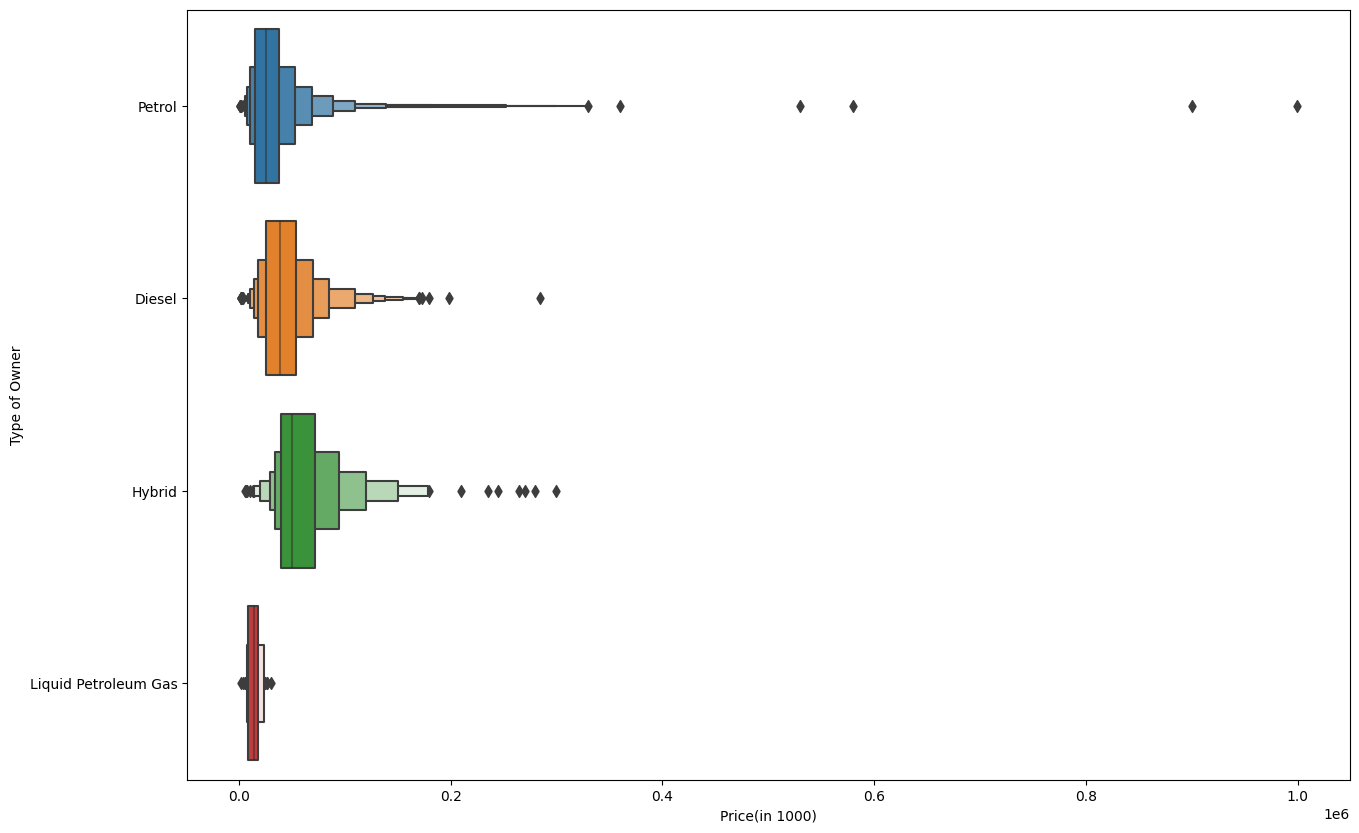

In [177]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="Price",y="Fuels",data=df).set(xlabel='Price(in 1000)',ylabel='Type of Owner')

In [178]:
# Finding extreme outliers in the Price column

sorted(df['Price'], reverse=True)[0:10]

[999000,
 899900,
 579900,
 529990,
 359850,
 329999,
 324900,
 319900,
 314988,
 299990]

In [179]:
df=df[~(df['Price']>200000) & (df['Price']<=999000)]

### Year

[Text(0.5, 0, 'Power'), Text(0, 0.5, 'Price')]

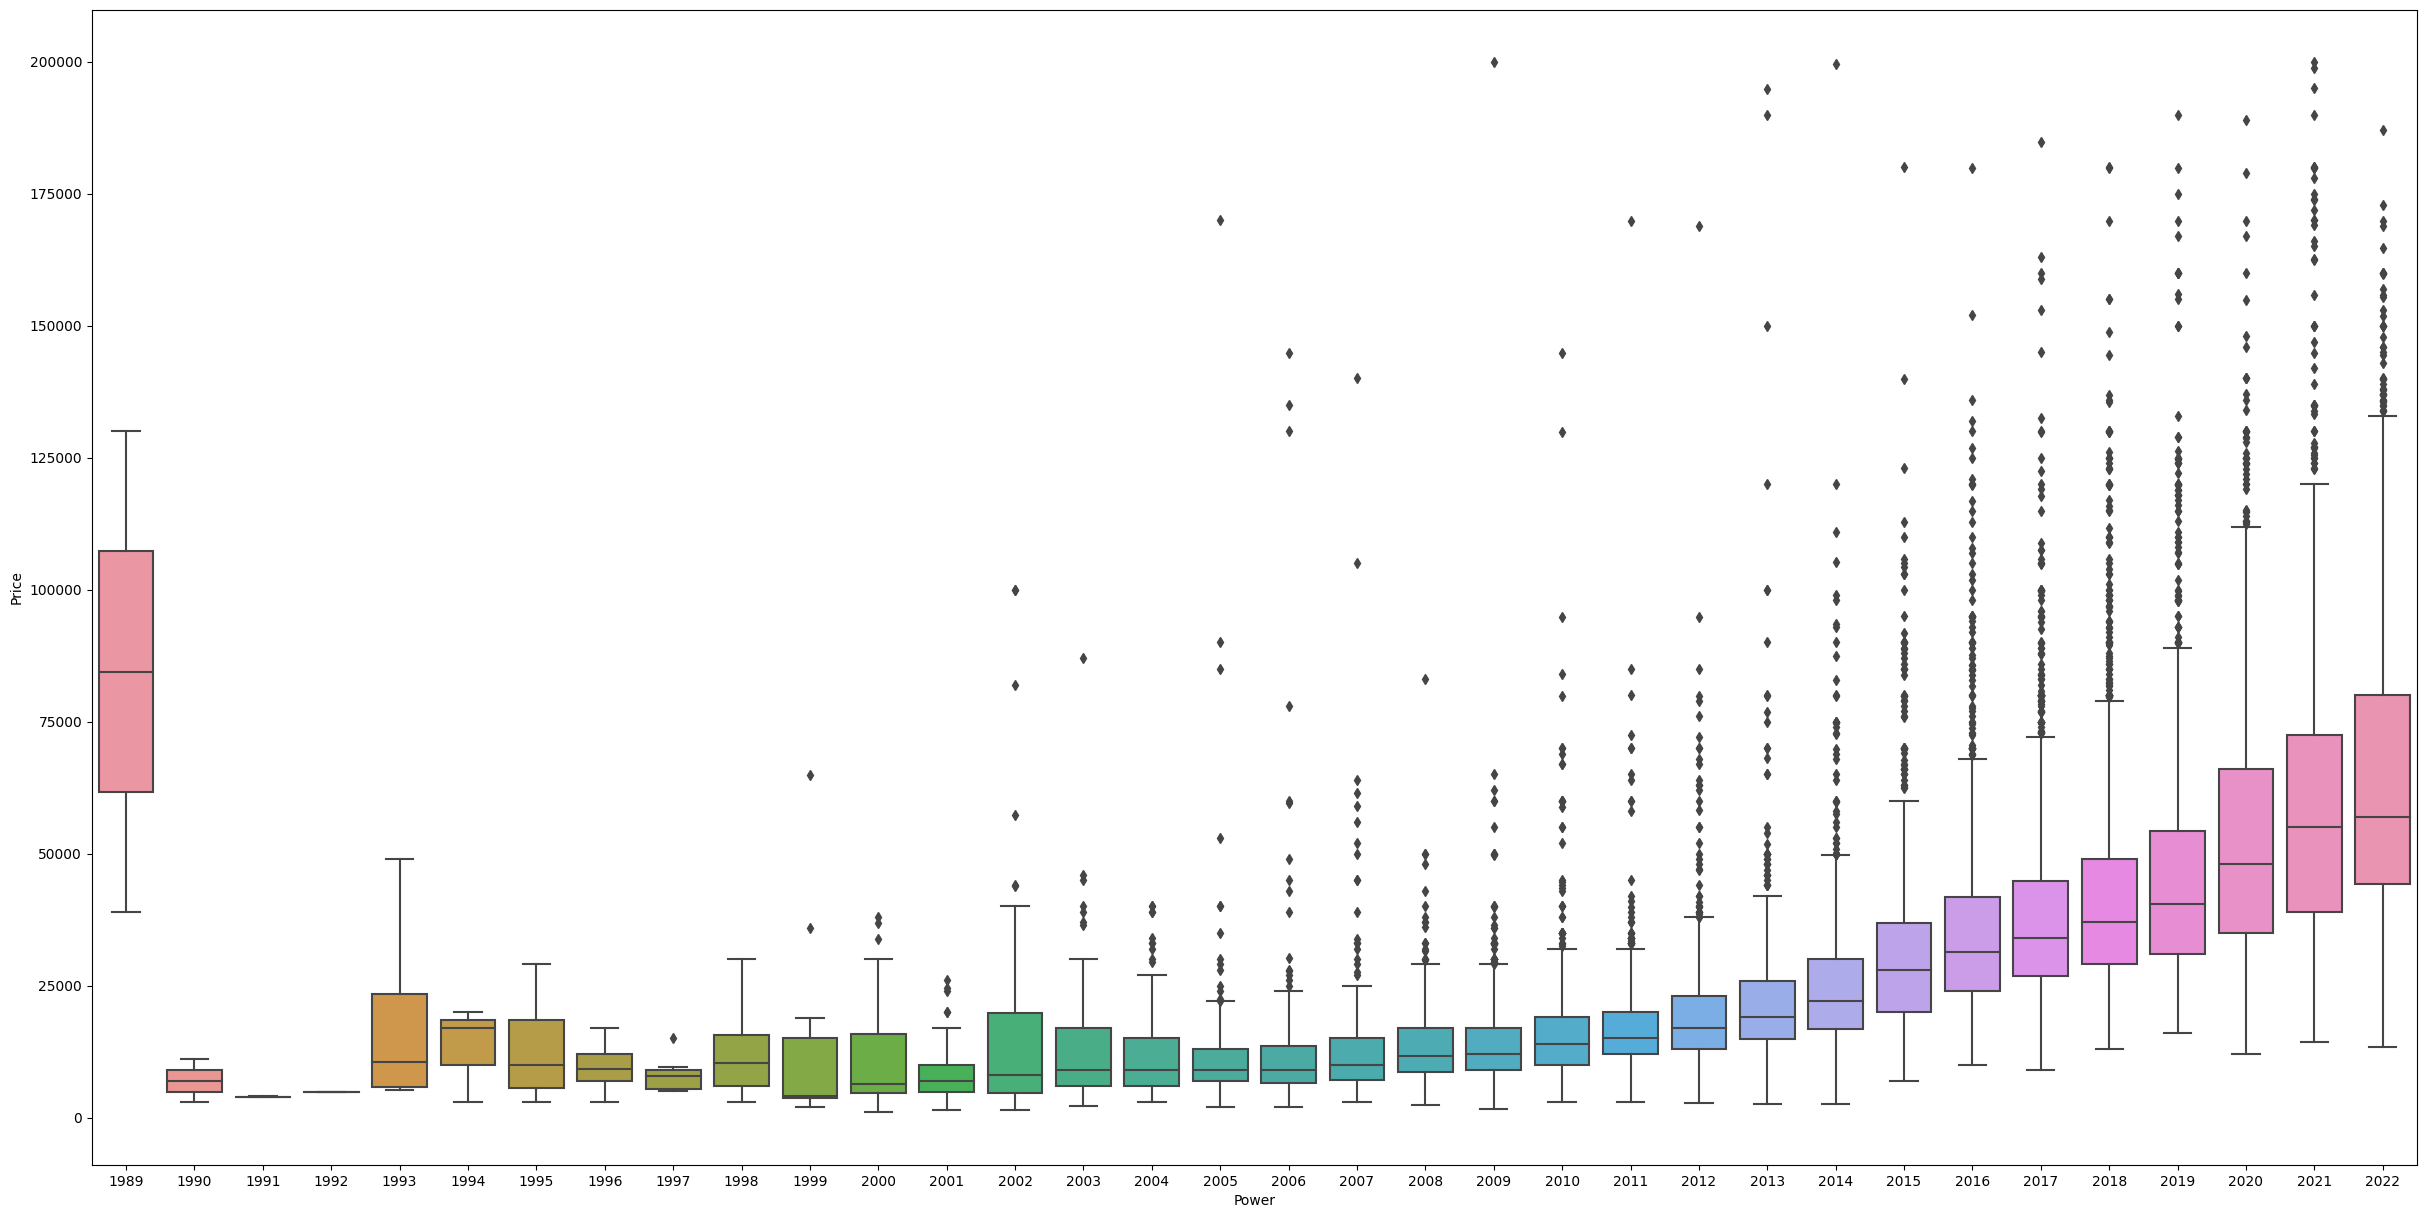

In [181]:
plt.figure(figsize = (30,15))
sns.boxplot(x='Year',y='Price',data=df).set(xlabel='Power',ylabel='Price')

In [182]:
# finding the outliers in the dataset using the IQR method
# These are the Quartile ranges Q3 and Q1
percentile75 = df['Year'].quantile(0.75)
percentile25= df['Year'].quantile(0.25)
print('percentile75 is: ', percentile75)
print('percentile25 is: ', percentile25)

# IQR=Inter-Quartile Range
iqr=percentile75 - percentile25
print('IQR is: ', iqr)

# Finding the upper limit and lower limit.
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr

print('upper_limit is: ', upper_limit)
print('lower_limit is: ', lower_limit)

percentile75 is:  2019.0
percentile25 is:  2013.0
IQR is:  6.0
upper_limit is:  2028.0
lower_limit is:  2004.0


In [183]:
df[df['Year']<lower_limit].shape

(345, 9)

In [184]:
# Capping the values of Year which are below the lower limit
df['Year']=np.where(df['Year']>upper_limit, upper_limit, np.where(df['Year']<lower_limit, lower_limit, df['Year']))

### Kilometers

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_8052\3706878010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Kilometers'])


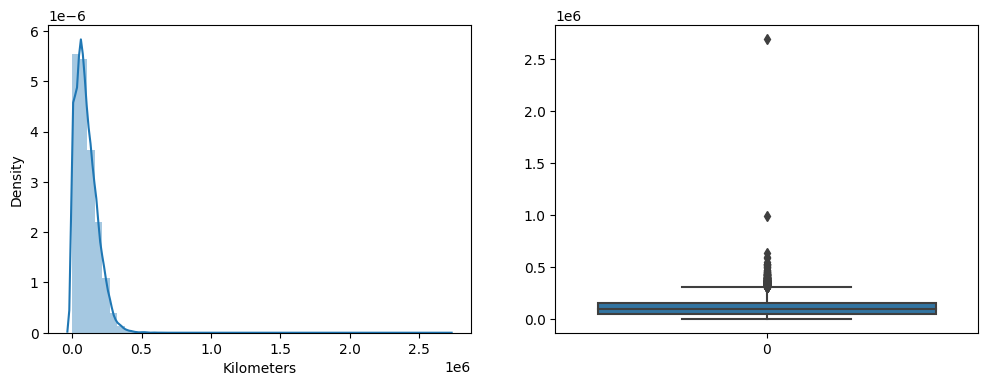

In [185]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['Kilometers'])

plt.subplot(122)
sns.boxplot(df['Kilometers'])
plt.show()

In [186]:
sorted(df['Kilometers'], reverse=True)[0:5]

[2700000, 987475, 634470, 598000, 583000]

In [187]:
# removing the extreme outliers in the kilometer col
df=df[~(df['Kilometers']>=500000) & (df['Kilometers']<=634470)]

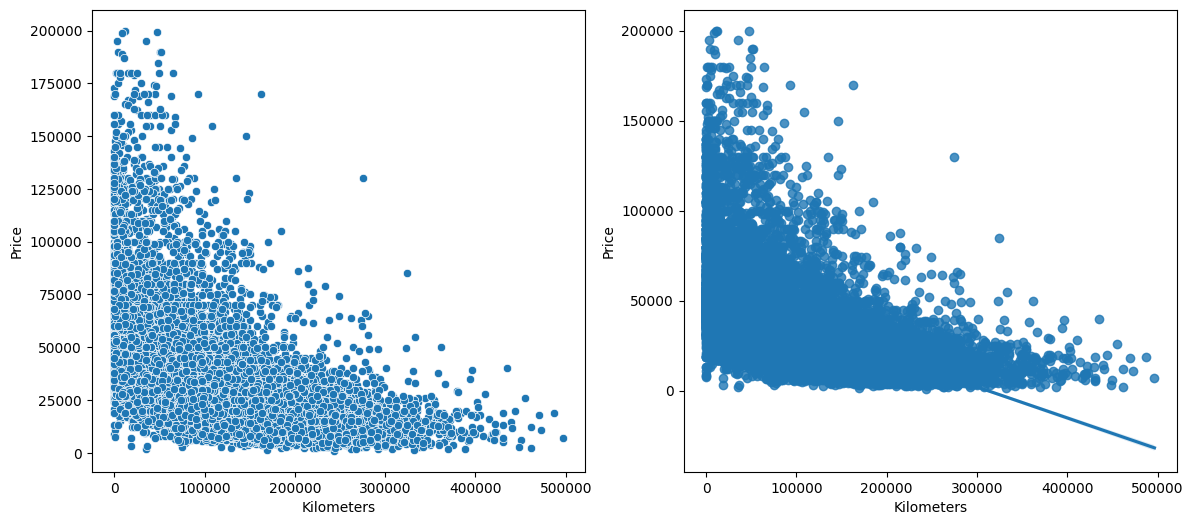

In [188]:
# finding the line of regression
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(x=df['Kilometers'], y=df['Price'])

plt.subplot(122)
sns.regplot(x=df['Kilometers'], y=df['Price'])
plt.show()

## Resetting the index 

In [190]:
# Resetting the index after the drop of columns
df=df.reset_index(drop=True)

In [192]:
df.head()

,Brand,Price,Year,Kilometers,Type,Status,Fuels,CC,Gearbox
0,Toyota,9999,2010.0,263000,Wagon,Used,Petrol,2362,Automatic
1,MercedesBenz,117990,2021.0,19,Wagon,NewInStock,Diesel,2143,Automatic
2,MercedesBenz,79990,2021.0,24,Wagon,NewInStock,Diesel,2143,Automatic
3,MercedesBenz,34990,2010.0,120579,Sedan,Used,Diesel,2143,Automatic
4,Holden,15990,2016.0,72506,Wagon,Used,Petrol,1796,Automatic


## Correlation between features

In [193]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

               Price      Year  Kilometers        CC
Price       1.000000  0.587037   -0.527708  0.300264
Year        0.587037  1.000000   -0.759376 -0.175187
Kilometers -0.527708 -0.759376    1.000000  0.196682
CC          0.300264 -0.175187    0.196682  1.000000


### Plotting a heatmap

<Axes: >

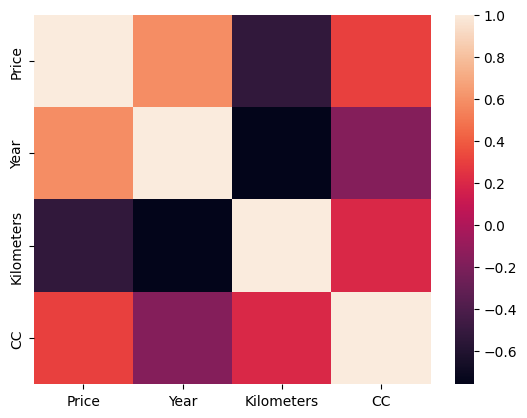

In [194]:
# Finding Correlation between various numeric columns

sns.heatmap(correlation_matrix)

# MAKING MODEL USING LINEAR REGRESSION

## Defining Dependent and Independent Variables

#### Dependent variable will be everything apart from price

In [195]:
X=df.drop(columns=['Price'])

#### Independent variable will be price

In [197]:
y=np.log(df['Price'])

### Assigning One Hot Encoder for categorical columns

In [199]:
ohe=OneHotEncoder()

In [200]:
ohe.fit(X[['Brand','Type','Fuels','Status','Gearbox']])

OneHotEncoder()

### Creating a column transformer

In [201]:
col_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Type','Fuels','Status','Gearbox']),
                                
                                 remainder='passthrough')

#### Creating a loop to see at which point I am getting the best results.

In [215]:
scores=[]
# Creating a for loop
for i in range (1000):
    # Creating a sample data from which we will train and test our data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(col_trans, lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [216]:
# Checking for the point where I got the best result
np.argmax(scores)

331

In [217]:
# Finding the result
scores[np.argmax(scores)]

0.8424183901618267

## Splitting Test and Train data sets

### Train and Test data is split by 90-10 ratio, also Train data is fixed

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=np.argmax(scores))

### Model Training and creating a Pipe

In [219]:
lr=LinearRegression()
pipe=make_pipeline(col_trans, lr)

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

### Checking R2_score and Mean_Absolute_Error

In [220]:
print('R2 score is: ', r2_score(y_test, y_pred))
print('MAE is: ', mean_absolute_error(y_test, y_pred))

R2 score is:  0.8424183901618267
MAE is:  0.211019975593572
